In [ ]:
import talib 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
 
#importing Dataset
data = pd.read_csv('AAPL.csv')

#changing date format to European instead of American 
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])
df["Date"] = df['Date'].dt.strftime('%d/%m/%Y')

## Wskaźniki

In [6]:

# Calculate RSI (Relative Strength Index) with a 14-day period
# Relative Strength Index (RSI): Measures the magnitude of recent price changes to identify overbought or oversold conditions.
# Values range from 0 to 100.
# A value above 70 indicates overbought conditions, while below 30 indicates oversold conditions.

df["RSI_14"] = talib.RSI(df["Close"], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
# Moving Average Convergence Divergence (MACD): Tracks the relationship between two moving averages to identify trends.
# Comprises three components:
# MACD: The difference between two EMAs (12-day and 26-day).
# MACD_Signal: The 9-day EMA of the MACD.
# MACD_Hist: The difference between MACD and MACD_Signal (useful for identifying trends).

df["MACD"], df["MACD_Signal"], df["MACD_Hist"] = talib.MACD(df["Close"], fastperiod=12, slowperiod=26, signalperiod=9)

# Calculate ATR (Average True Range) with a 14-day period
# Average True Range (ATR): Quantifies volatility by considering price range over a set period.
# High ATR values indicate high volatility, while low ATR values indicate low volatility.\

df["ATR_14"] = talib.ATR(df["High"], df["Low"], df["Close"], timeperiod=14)

# Calculate OBV (On-Balance Volume)
# On-Balance Volume (OBV): Tracks volume flow to predict changes in stock price.
# Cumulative measure of volume flow, where price increases add volume and price decreases subtract it.

df["OBV"] = talib.OBV(df["Close"], df["Volume"])

# Save the updated DataFrame to a new CSV file
#df.to_csv("AAPL_with_indicators.csv", index=False)

# Display the first few rows of the updated DataFrame

print(df.head())


         Date      Close       High        Low       Open     Volume  RSI_14  \
0  21/01/2020  76.727280  77.321083  76.589127  76.877548  110843200     NaN   
1  22/01/2020  77.001137  77.556160  76.906609  77.214417  101832400     NaN   
2  23/01/2020  77.371986  77.451965  76.504295  77.054481  104472000     NaN   
3  24/01/2020  77.148987  78.365685  76.957512  77.619186  146537600     NaN   
4  27/01/2020  74.880402  75.563881  73.893951  75.149429  161940000     NaN   

   MACD  MACD_Signal  MACD_Hist  ATR_14          OBV  
0   NaN          NaN        NaN     NaN  110843200.0  
1   NaN          NaN        NaN     NaN  212675600.0  
2   NaN          NaN        NaN     NaN  317147600.0  
3   NaN          NaN        NaN     NaN  170610000.0  
4   NaN          NaN        NaN     NaN    8670000.0  


## Zapisywanie do nowego CSV

In [ ]:
# Save the updated DataFrame to a new CSV file
#df.to_csv("AAPL_with_indicators.csv", index=False)

## Wykresy wskaźników

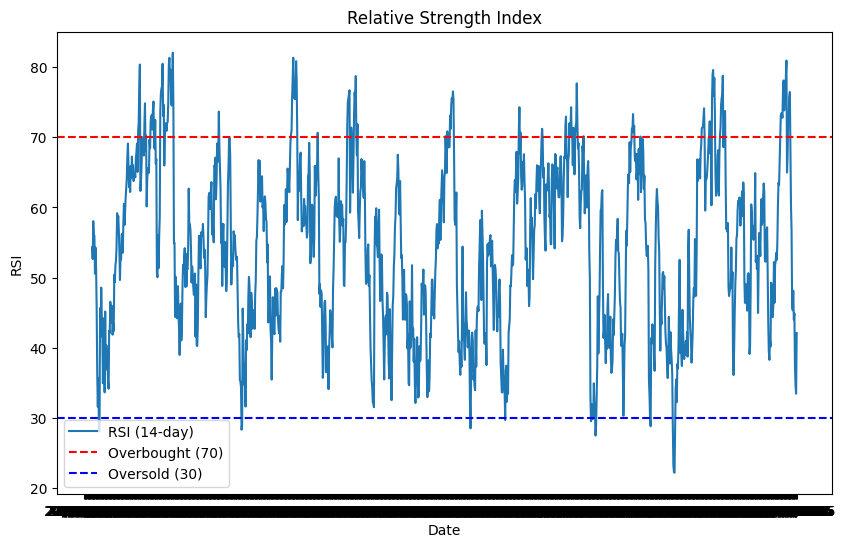

In [5]:
# Plot RSI
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["RSI_14"], label="RSI (14-day)")
plt.axhline(70, color="red", linestyle="--", label="Overbought (70)")
plt.axhline(30, color="blue", linestyle="--", label="Oversold (30)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.title("Relative Strength Index")
plt.legend()
plt.show()

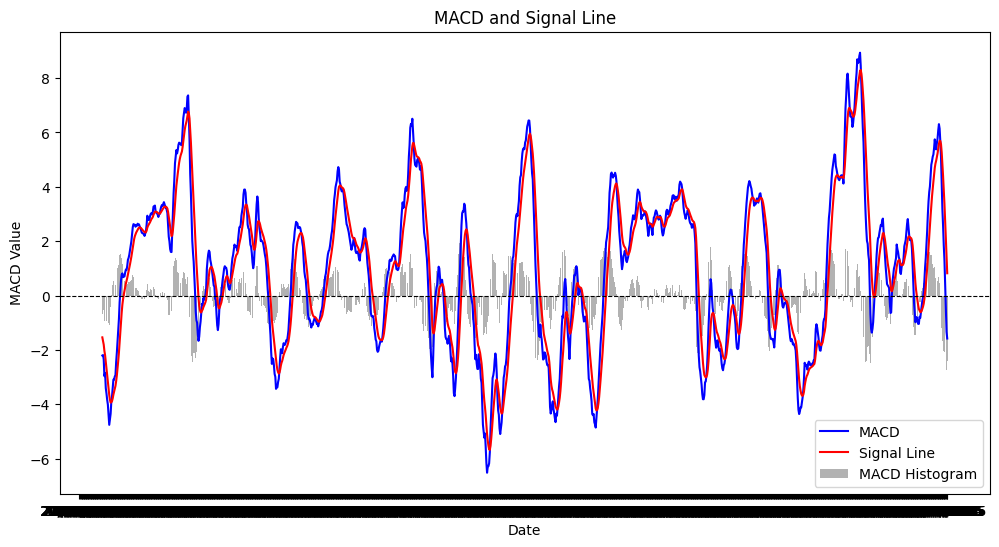

In [7]:
# Plot MACD, Signal Line, and Histogram
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["MACD"], label="MACD", color="blue")
plt.plot(df["Date"], df["MACD_Signal"], label="Signal Line", color="red")
plt.bar(df["Date"], df["MACD_Hist"], label="MACD Histogram", color="gray", alpha=0.6)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.title("MACD and Signal Line")
plt.legend()
plt.show()

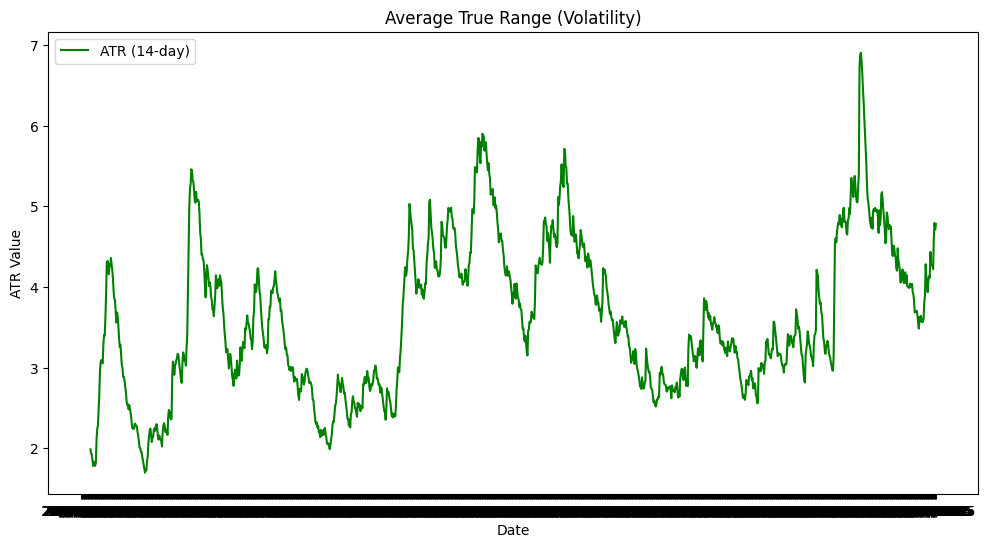

In [8]:
# Plot ATR to visualize volatility
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["ATR_14"], label="ATR (14-day)", color="green")
plt.xlabel("Date")
plt.ylabel("ATR Value")
plt.title("Average True Range (Volatility)")
plt.legend()
plt.show()

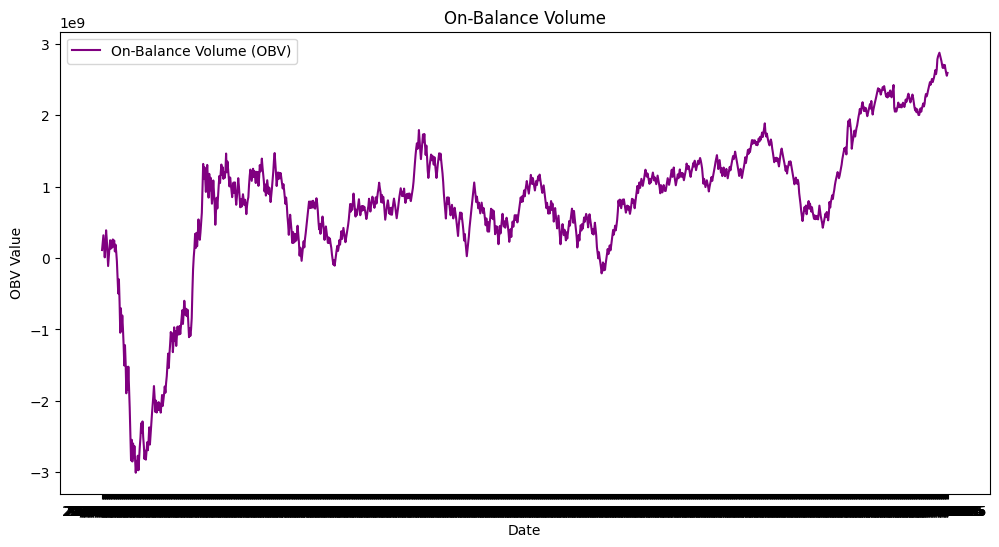

In [9]:
# Plot OBV
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["OBV"], label="On-Balance Volume (OBV)", color="purple")
plt.xlabel("Date")
plt.ylabel("OBV Value")
plt.title("On-Balance Volume")
plt.legend()
plt.show()